In [99]:
import pandas as pd
import numpy as np
import os
import warnings
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
raw_data = pd.read_csv(r'data/Raw_data/train.csv')

In [106]:
raw_data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [107]:
raw_data.isnull().sum()/len(raw_data)

qty_dot_url             0.0
qty_hyphen_url          0.0
qty_underline_url       0.0
qty_slash_url           0.0
qty_questionmark_url    0.0
                       ... 
qty_redirects           0.0
url_google_index        0.0
domain_google_index     0.0
url_shortened           0.0
phishing                0.0
Length: 112, dtype: float64

In [108]:
raw_data.select_dtypes(include=np.number)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [109]:
raw_data.qty_space_domain.unique()

array([0], dtype=int64)

In [110]:
CATEGORICAL_COLUMN = []
NUMERICAL_COLUMN = []
TO_BE_DROPED_COLUMN = []
for i in raw_data.columns:
    print(f"Unique values in {i} : ",len(raw_data[i].unique()))
    if len(raw_data[i].unique())>1 and len(raw_data[i].unique())<15 :
        CATEGORICAL_COLUMN.append(i)
    elif len(raw_data[i].unique())<=1:
        TO_BE_DROPED_COLUMN.append(i)
    else:
        NUMERICAL_COLUMN.append(i)
        
        

Unique values in qty_dot_url :  23
Unique values in qty_hyphen_url :  30
Unique values in qty_underline_url :  22
Unique values in qty_slash_url :  25
Unique values in qty_questionmark_url :  6
Unique values in qty_equal_url :  20
Unique values in qty_at_url :  15
Unique values in qty_and_url :  21
Unique values in qty_exclamation_url :  10
Unique values in qty_space_url :  8
Unique values in qty_tilde_url :  6
Unique values in qty_comma_url :  8
Unique values in qty_plus_url :  10
Unique values in qty_asterisk_url :  18
Unique values in qty_hashtag_url :  7
Unique values in qty_dollar_url :  10
Unique values in qty_percent_url :  52
Unique values in qty_tld_url :  9
Unique values in length_url :  453
Unique values in qty_dot_domain :  19
Unique values in qty_hyphen_domain :  12
Unique values in qty_underline_domain :  4
Unique values in qty_slash_domain :  1
Unique values in qty_questionmark_domain :  1
Unique values in qty_equal_domain :  1
Unique values in qty_at_domain :  2
Unique 

* Column contains same value for all rows need to be dropped 
* Columns contains less than 20 uniques values would be considerd as categorical columns
* Rest all will be treated as Numerical column

In [111]:
raw_data.drop(columns=TO_BE_DROPED_COLUMN,inplace=True)

In [112]:
raw_data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


* `H0` is two variables are independent

In [113]:
for i in CATEGORICAL_COLUMN:
    if i!='phishing':
        temp_ct=pd.crosstab(raw_data.phishing,raw_data[i])
        chi2, p, dof, ex = chi2_contingency(temp_ct.values)
        if p<=0.05:
            pass
            #print("the {} and phishing are dependent and p-value is {}".format(i,round(p,3)))
        else:
            print("the {} and phishing are independent and p-value is {}".format(i,round(p,3)))

the qty_underline_domain and phishing are independent and p-value is 0.493
the qty_at_domain and phishing are independent and p-value is 0.746
the server_client_domain and phishing are independent and p-value is 0.425


In [114]:
raw_data.server_client_domain.value_counts()

0    88248
1      399
Name: server_client_domain, dtype: int64

In [115]:
raw_data[raw_data.server_client_domain==1]['phishing'].value_counts()/len(raw_data[raw_data.server_client_domain==1])

0    0.634085
1    0.365915
Name: phishing, dtype: float64

In [116]:
raw_data[raw_data.server_client_domain==0]['phishing'].value_counts()/len(raw_data[raw_data.server_client_domain==0])

0    0.654372
1    0.345628
Name: phishing, dtype: float64

In [117]:
raw_data.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.109737,0.127851,0.246201,0.409549,0.498531,0.169224,0.550918,0.004187,-0.000405,...,-0.054120,-0.014089,-0.049845,0.012300,-0.065105,-0.051842,-0.004035,-0.002490,-0.059222,0.171128
qty_hyphen_url,0.109737,1.000000,0.213589,0.304762,0.061247,0.175158,0.041982,0.127984,0.018253,0.018090,...,0.029222,0.032991,-0.027048,-0.031027,0.009113,-0.001930,-0.002939,0.006875,-0.010346,0.200382
qty_underline_url,0.127851,0.213589,1.000000,0.246653,0.067009,0.334635,0.056885,0.256192,0.062300,-0.000767,...,0.004625,0.023962,-0.007595,-0.027089,0.012809,-0.013864,-0.001823,0.003421,-0.012158,0.191151
qty_slash_url,0.246201,0.304762,0.246653,1.000000,0.182759,0.287043,0.102281,0.202511,0.025946,0.015055,...,-0.046034,-0.032416,-0.045904,-0.021936,-0.018282,-0.047873,-0.005406,0.009470,-0.001125,0.699061
qty_questionmark_url,0.409549,0.061247,0.067009,0.182759,1.000000,0.461202,0.126747,0.467278,0.017859,0.004359,...,-0.025966,-0.003923,-0.032176,-0.006653,-0.040856,-0.024214,0.011679,0.010029,0.012847,0.111694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qty_redirects,-0.051842,-0.001930,-0.013864,-0.047873,-0.024214,-0.043475,-0.017895,-0.030949,0.004488,-0.006923,...,0.274887,0.051420,0.133489,0.007329,0.306561,1.000000,0.038041,0.033091,0.049475,-0.061775
url_google_index,-0.004035,-0.002939,-0.001823,-0.005406,0.011679,-0.000349,-0.001903,-0.000335,-0.000811,-0.000336,...,0.043826,0.042233,0.022227,0.007591,0.026047,0.038041,1.000000,0.628815,-0.001785,-0.008986
domain_google_index,-0.002490,0.006875,0.003421,0.009470,0.010029,0.004701,-0.001889,0.001886,-0.001076,-0.000446,...,0.039959,0.040542,0.023628,0.008920,0.027592,0.033091,0.628815,1.000000,0.000045,0.000794
url_shortened,-0.059222,-0.010346,-0.012158,-0.001125,0.012847,-0.011855,-0.005330,-0.009989,-0.002503,-0.001038,...,0.059500,0.084482,0.013533,-0.031268,0.037850,0.049475,-0.001785,0.000045,1.000000,0.099250


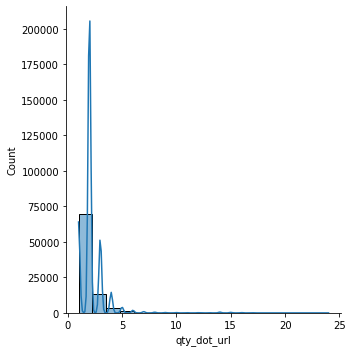

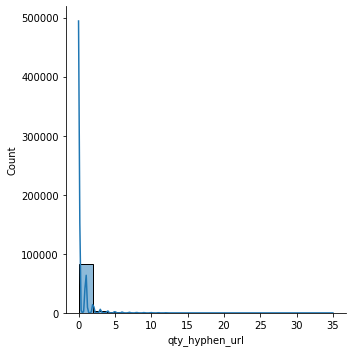

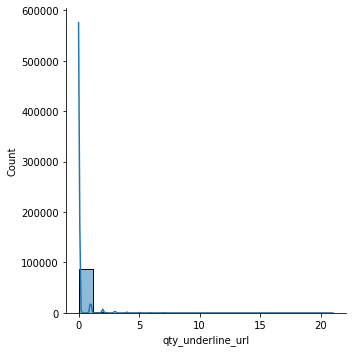

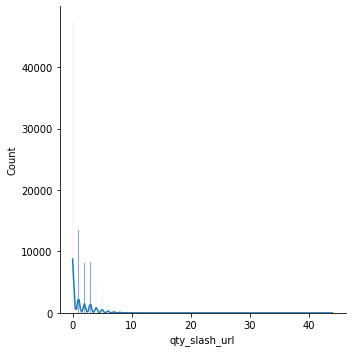

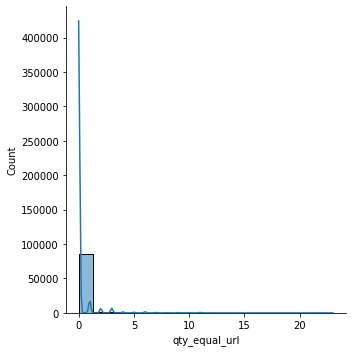

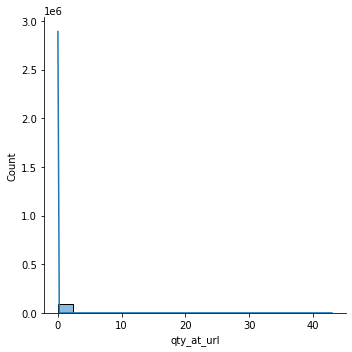

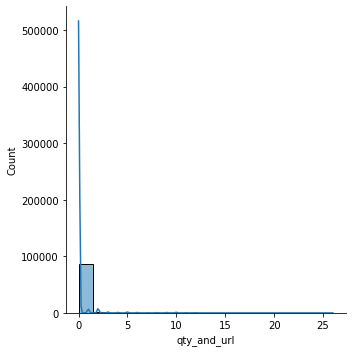

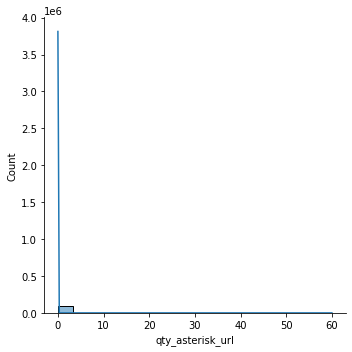

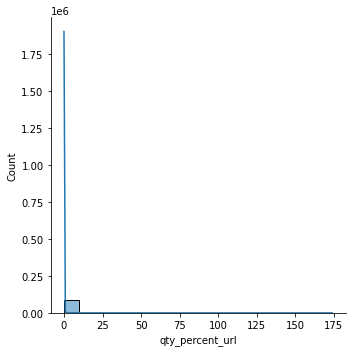

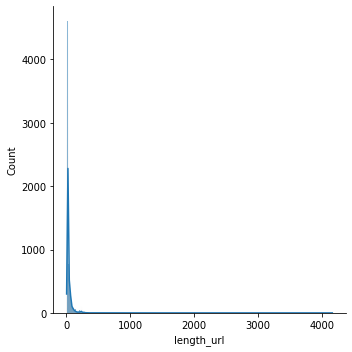

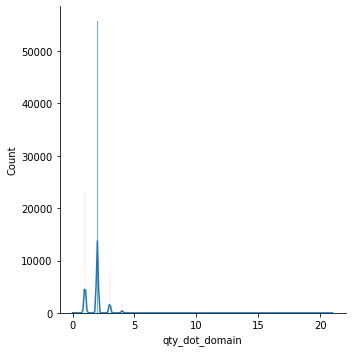

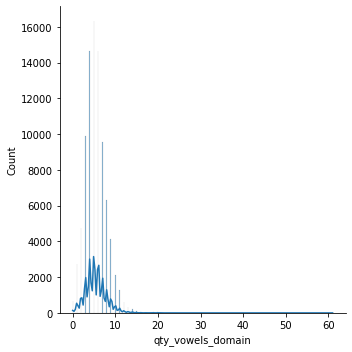

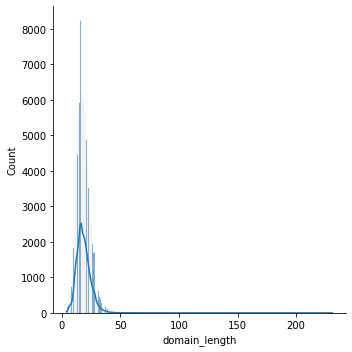

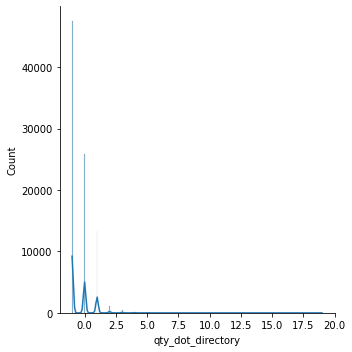

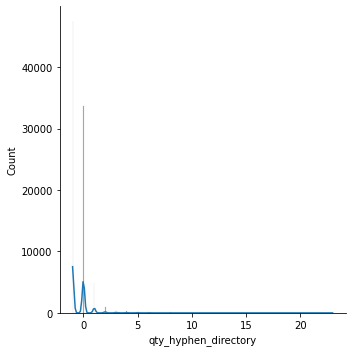

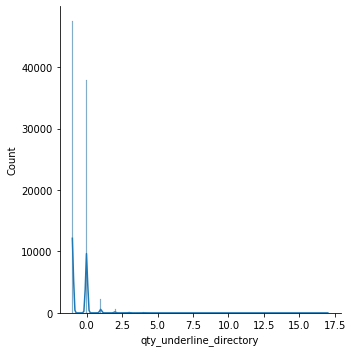

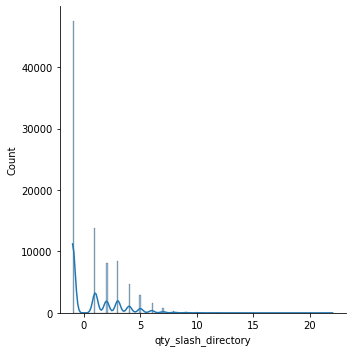

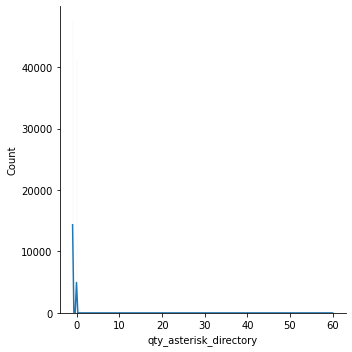

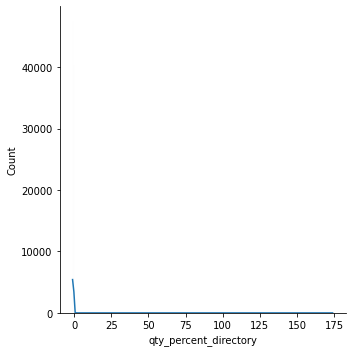

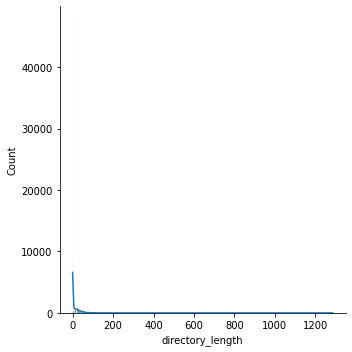

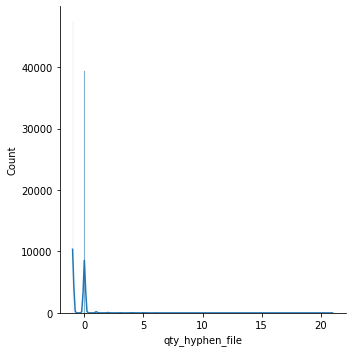

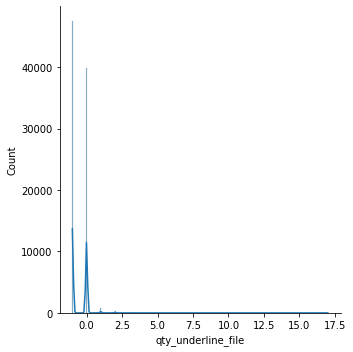

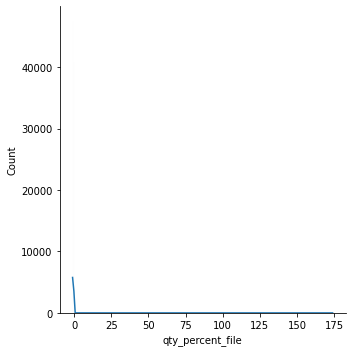

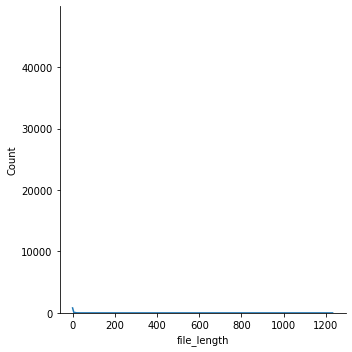

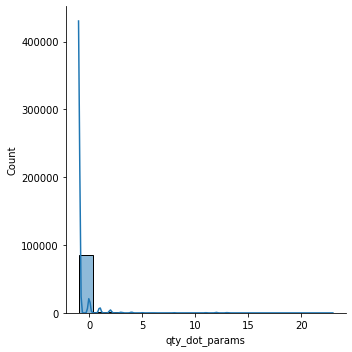

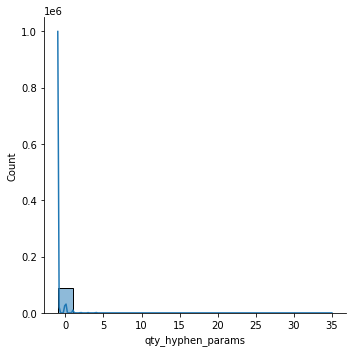

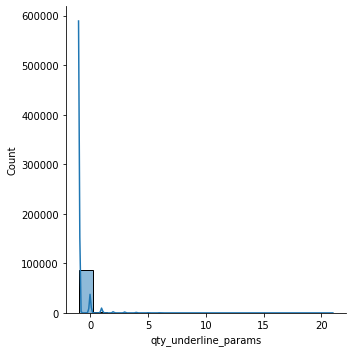

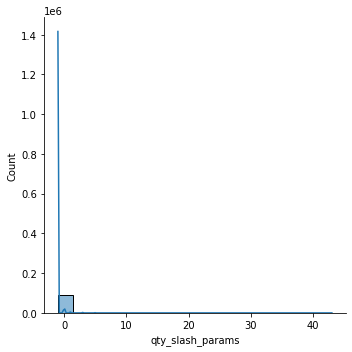

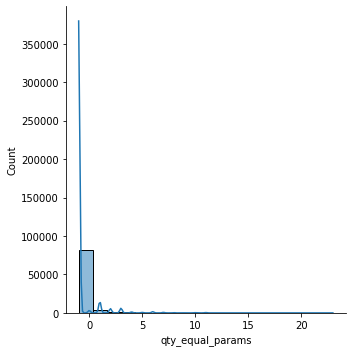

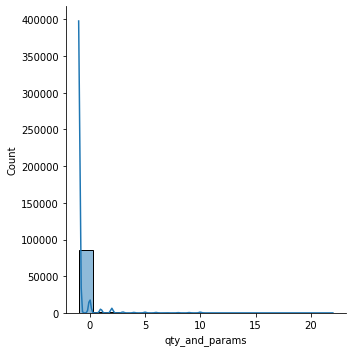

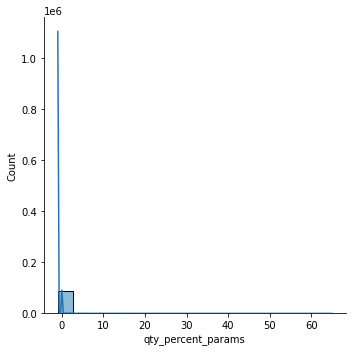

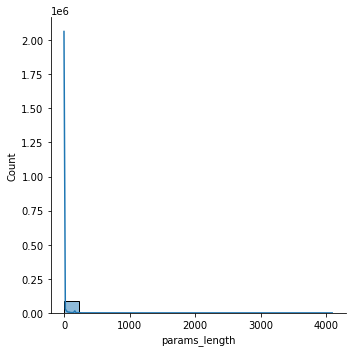

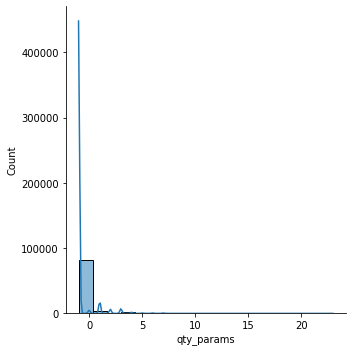

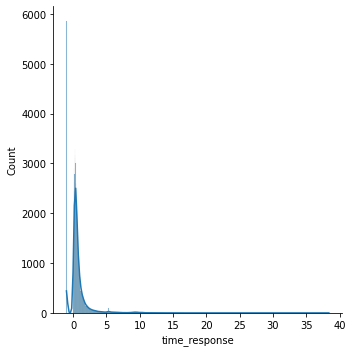

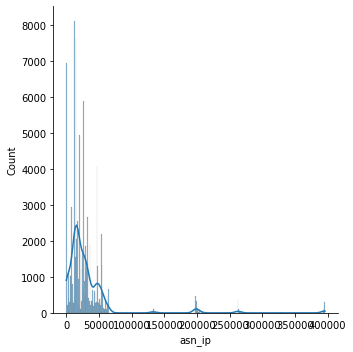

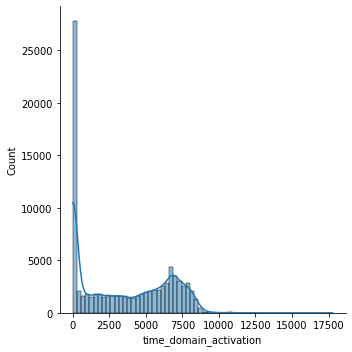

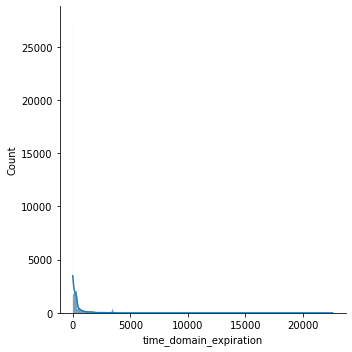

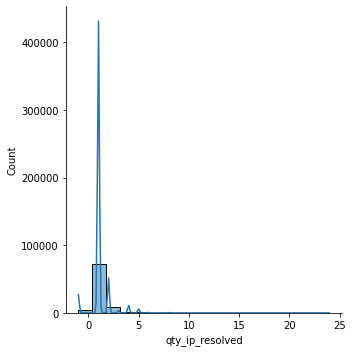

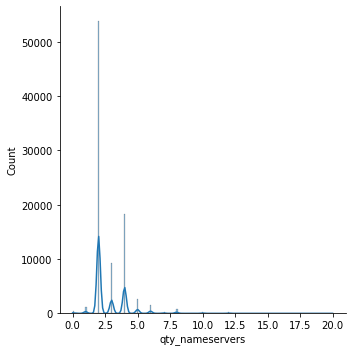

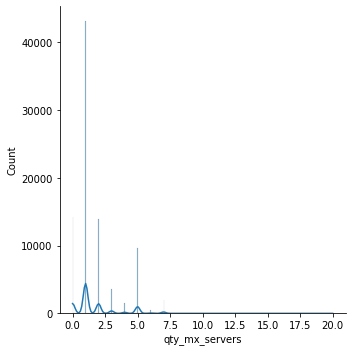

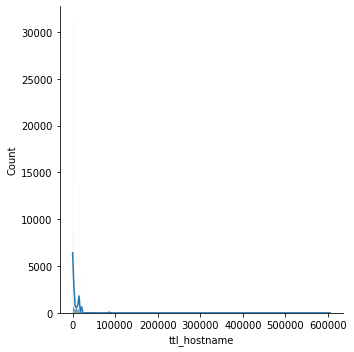

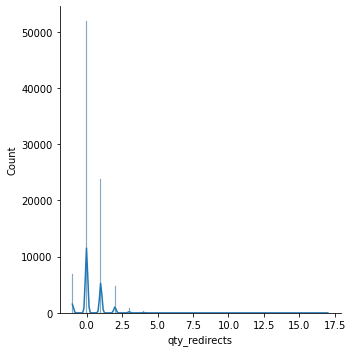

In [15]:
for i in NUMERICAL_COLUMN:
    sns.displot(raw_data[i],kde=True)
    plt.show()

In [118]:
outlier_df = pd.DataFrame(columns=['feature','upper_limit','lower_limit'])
up_limit = []
lw_limit = []
def outlier(df,num_column):
    for i in num_column:
        q3=df[i].quantile(0.75)
        q1=df[i].quantile(0.25)
        iqr=q3-q1
        up_limit.append(q3+1.5*iqr)
        lw_limit.append(q1-1.5*iqr)
        
    outlier_df['feature']=NUMERICAL_COLUMN
    outlier_df['upper_limit'] = up_limit
    outlier_df['lower_limit'] = lw_limit
    
    return outlier_df
        

In [119]:
outlier_df=outlier(raw_data,NUMERICAL_COLUMN)

In [120]:
outlier_df

,feature,upper_limit,lower_limit
0,qty_dot_url,2.000000,2.000000
1,qty_hyphen_url,0.000000,0.000000
2,qty_underline_url,0.000000,0.000000
3,qty_slash_url,5.000000,-3.000000
4,qty_equal_url,0.000000,0.000000
5,qty_at_url,0.000000,0.000000
6,qty_and_url,0.000000,0.000000
7,qty_asterisk_url,0.000000,0.000000
8,qty_percent_url,0.000000,0.000000
9,length_url,69.500000,-14.500000


In [121]:
raw_data[raw_data.qty_hyphen_url>9]['qty_hyphen_url'].count()

251

### Any outlier will be replaced with mean of outlier to make data balance

In [122]:
for i in NUMERICAL_COLUMN:
    rd = raw_data[i].value_counts()
    raw_data[raw_data[i]>rd[rd<=75].index[0]][i]=np.array(rd[rd<=75].index).mean()

c:\users\1672040\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\1672040\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\1672040\appdata\local\programs\python\python37\lib\si

c:\users\1672040\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\1672040\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\1672040\appdata\local\programs\python\python37\lib\si

In [123]:
raw_data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


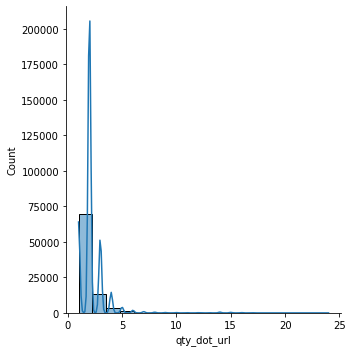

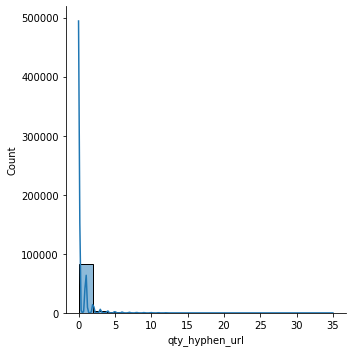

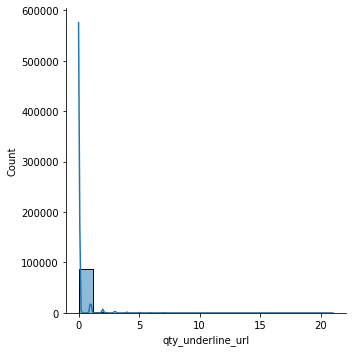

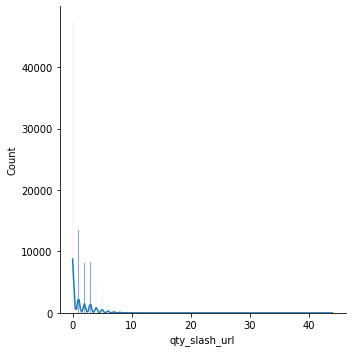

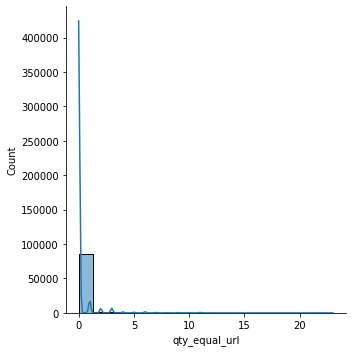

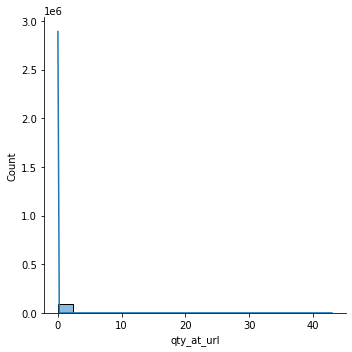

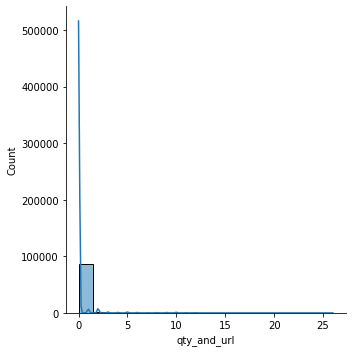

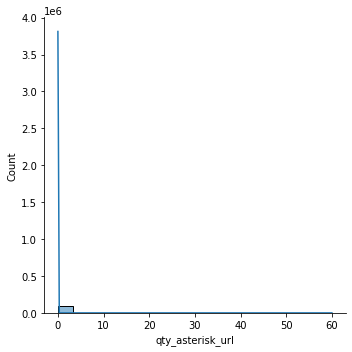

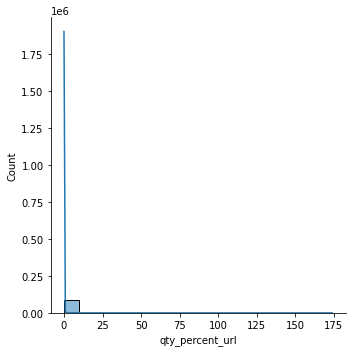

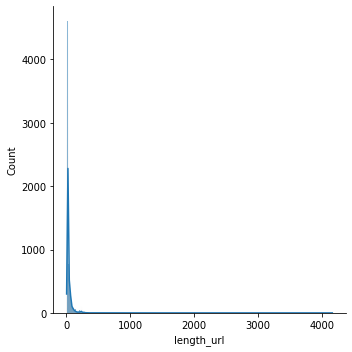

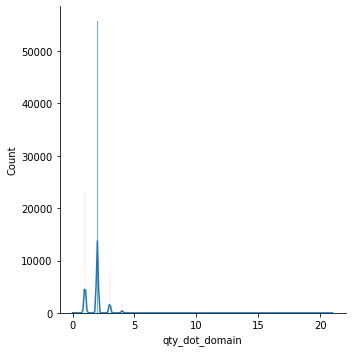

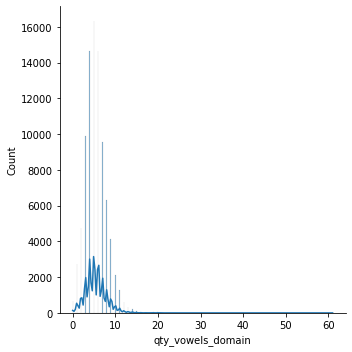

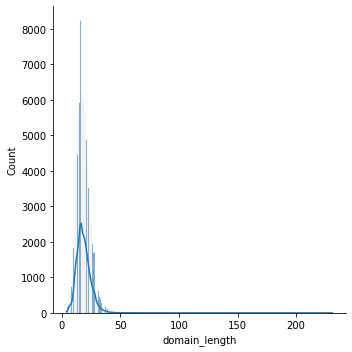

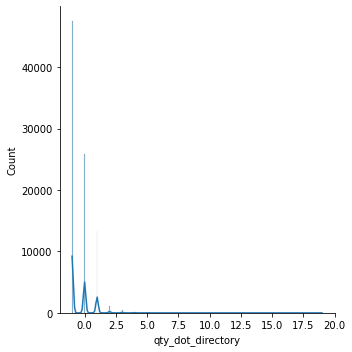

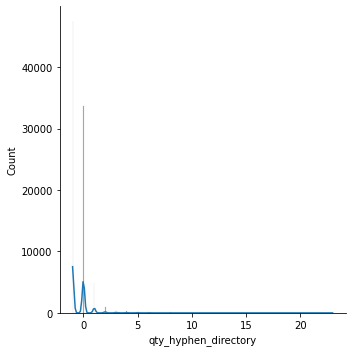

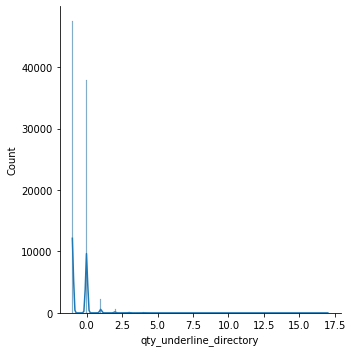

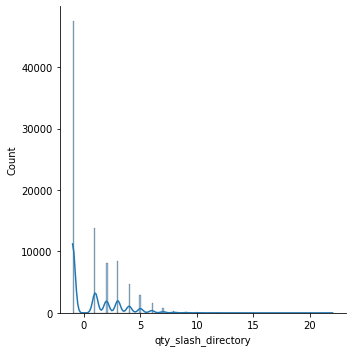

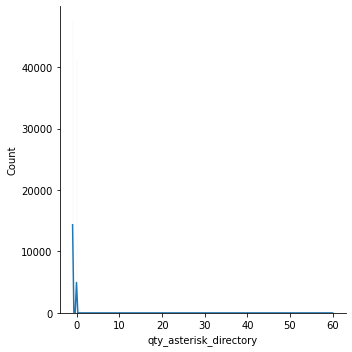

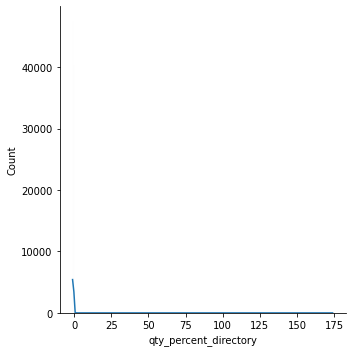

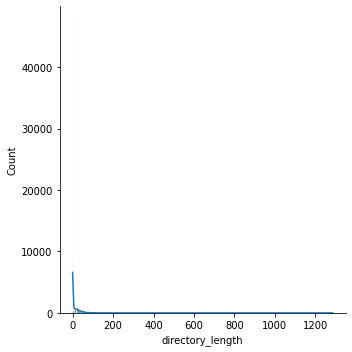

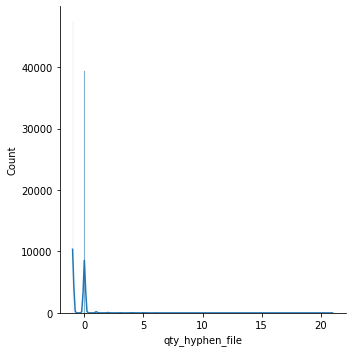

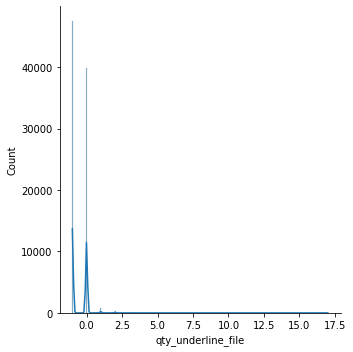

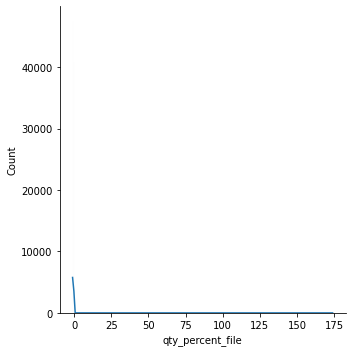

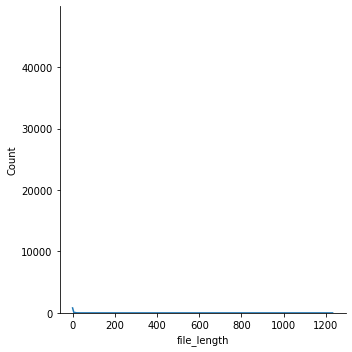

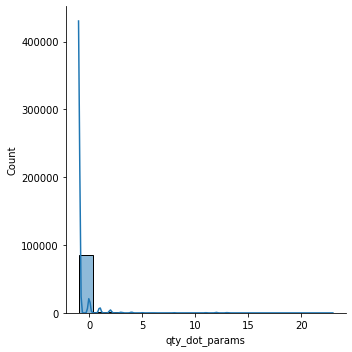

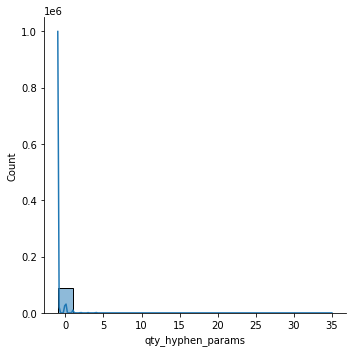

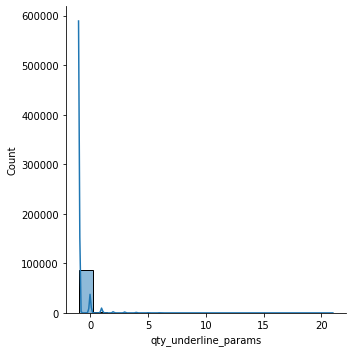

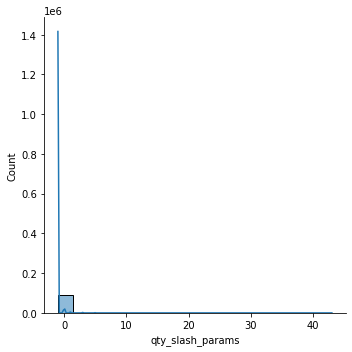

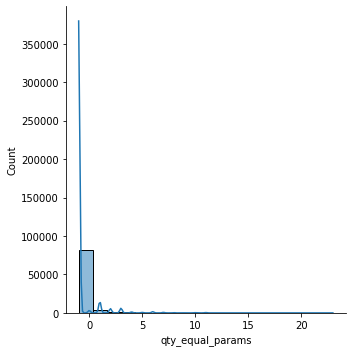

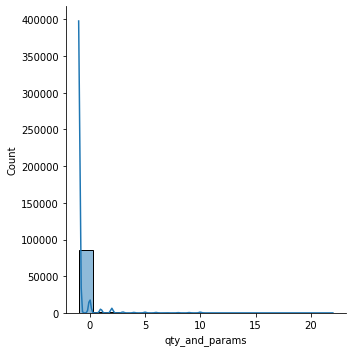

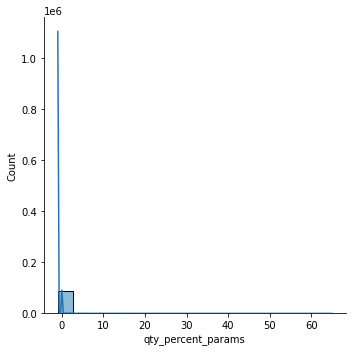

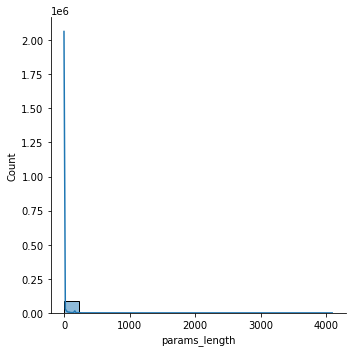

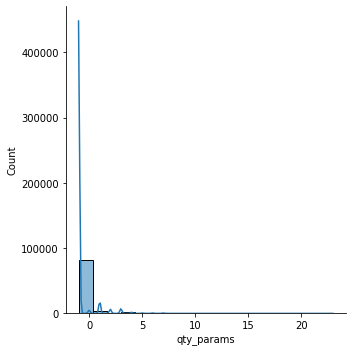

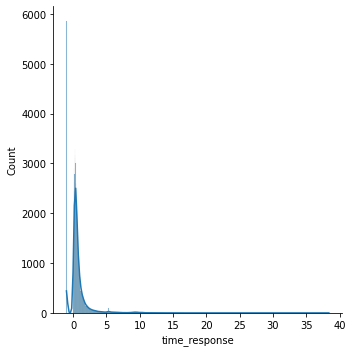

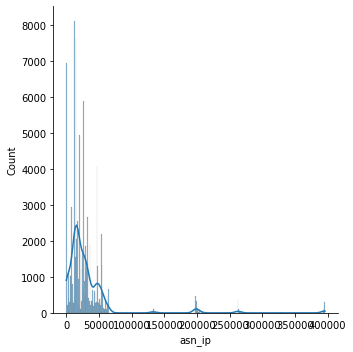

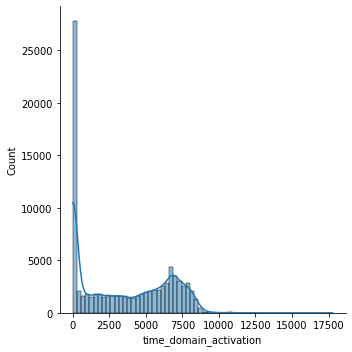

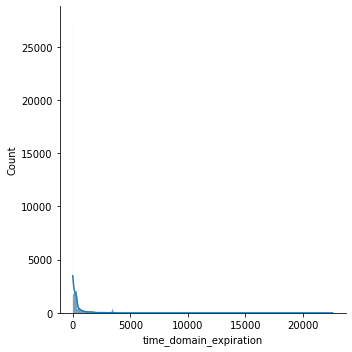

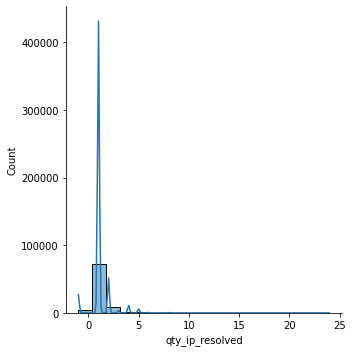

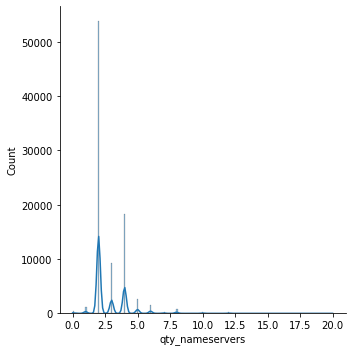

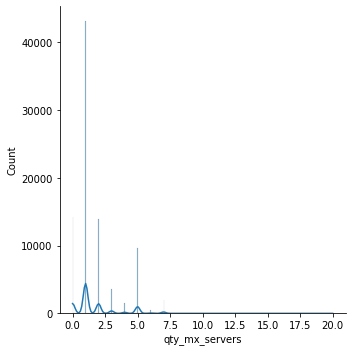

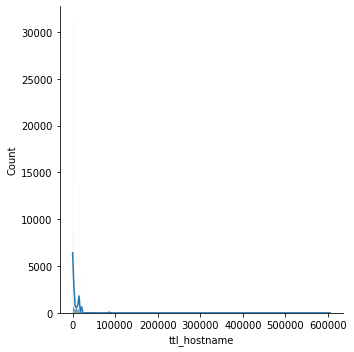

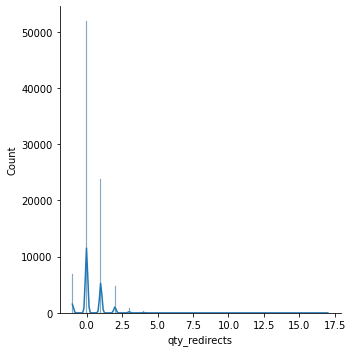

In [124]:
for i in NUMERICAL_COLUMN:
    sns.displot(raw_data[i],kde=True)
    plt.show()

In [126]:
to_be_transformed = [i for i in raw_data.columns if len(raw_data[i].value_counts())>2]

In [127]:
to_be_transformed

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_vowels_domain',
 'domain_length',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_directory',
 'qty_exclamation_directory',
 'qty_space_directory',
 'qty_tilde_directory',
 'qty_comma_directory',
 'qty_plus_directory',
 'qty_asterisk_directory',
 'qty_dollar_directory',
 'qty_percent_directory',
 'directory_length',
 'qty_dot_file',
 'qty_hyphen_file',
 'qty_underline_file',
 'qty_equal_file',
 'qty_at_file',
 'qty_and_file',
 'qty_exclamation_file',
 'qty_space_

In [104]:
raw_data.phishing.value_counts()

0.000000    88617
4.471429       17
3.583333       10
3.855536        2
2.716667        1
Name: phishing, dtype: int64